In [1]:
from models.DAX.DAX_models import DAX_XGBoost
from functions import get_DAX
from models.DAX.DAX_models import DAX_quantile_regression
from models.DAX.DAX_models import DAX_baseline, DAX_LSTM
from functions.evaluation import evaluate_horizon
from tqdm import tqdm
from functions import evaluate_dax

## Evaluation on validation set for hyperparameter tuning

In [6]:
daxdata = get_DAX.get(last_years=5)

In [7]:
daxdata

,Open,High,Low,Close,Volume,Dividends,Stock Splits,future_ret1,future_ret2,future_ret3,future_ret4,future_ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5
Date,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00+01:00,10477.769531,10612.719727,10386.969727,10580.190430,79626700,0.0,0.0,1.557696,-1.756660,-1.571855,-2.093120,-2.916636,0.200864,1.895711,-0.505609,-0.291716,-1.742910
2019-01-03 00:00:00+01:00,10467.110352,10538.660156,10400.110352,10416.660156,84733800,0.0,0.0,-3.314356,-3.129551,-3.650817,-4.474332,-4.733509,-1.557696,-1.356832,0.338015,-2.063305,-1.849412
2019-01-04 00:00:00+01:00,10533.940430,10786.339844,10483.900391,10767.690430,95339500,0.0,0.0,0.184805,-0.336460,-1.159976,-1.419153,-1.106164,3.314356,1.756660,1.957524,3.652371,1.251051
2019-01-07 00:00:00+01:00,10814.389648,10814.469727,10681.269531,10747.809570,71151400,0.0,0.0,-0.521266,-1.344781,-1.603958,-1.290969,-1.000767,-0.184805,3.129551,1.571855,1.772719,3.467566
2019-01-08 00:00:00+01:00,10750.190430,10910.709961,10745.030273,10803.980469,93672200,0.0,0.0,-0.823516,-1.082692,-0.769704,-0.479502,-0.809467,0.521266,0.336460,3.650817,2.093120,2.293984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 00:00:00+01:00,18019.859375,18179.810547,18019.859375,18179.250000,79118500,0.0,0.0,-0.146705,-0.450381,-1.121890,-1.309162,NaN,0.906883,1.060430,1.365610,1.343471,1.313432
2024-03-22 00:00:00+01:00,18175.080078,18225.970703,18140.990234,18205.939453,68616300,0.0,0.0,-0.303676,-0.975185,-1.162457,NaN,NaN,0.146705,1.053588,1.207136,1.512316,1.490176
2024-03-25 00:00:00+01:00,18206.359375,18285.580078,18176.849609,18261.310547,53804600,0.0,0.0,-0.671509,-0.858781,NaN,NaN,NaN,0.303676,0.450381,1.357264,1.510811,1.815991


### Run evaluation for time horizon of 3, 4, and 5 years

In [8]:
def evaluate_per_year(last_year=3):
    daxdata=get_DAX.get(last_year)
    start_date = '2023-09-01'
    end_date = '2023-09-30'
    baseline_model = {
        'name': 'Baseline Model',
        'function': DAX_baseline.DAX_baseline
    }
    quantile_regression_model = {
        'name': 'Quantile Regression',
        'function': DAX_quantile_regression.DAX_quantile_regression
    }
    lstm_model={
        'name': 'LSTM',
        'function': DAX_LSTM.DAX_LSTM
    }
    xgboost_model = {
        'name': 'XGBoost',
        'function': DAX_XGBoost.run_model
    }
    
    evaluations, grouped_scores = evaluate_dax.evaluate(lstm_model, baseline_model,quantile_regression_model, xgboost_model, df=daxdata, start_date=start_date, end_date=end_date)
    return evaluations, grouped_scores

Last Timestamp 2023-09-07 00:00:00+02:00


2024-03-27 10:25:54.725585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:25:54.727996: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:25:54.728693: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-27 10:25:55.124294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:25:55.125216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:25:55.126036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 - 2s - loss: 1.0013 - 2s/epoch - 191ms/step
Epoch 2/10
10/10 - 0s - loss: 0.9995 - 36ms/epoch - 4ms/step
Epoch 3/10
10/10 - 0s - loss: 0.9990 - 37ms/epoch - 4ms/step
Epoch 4/10
10/10 - 0s - loss: 0.9988 - 42ms/epoch - 4ms/step
Epoch 5/10
10/10 - 0s - loss: 0.9986 - 38ms/epoch - 4ms/step
Epoch 6/10
10/10 - 0s - loss: 0.9985 - 35ms/epoch - 4ms/step
Epoch 7/10
10/10 - 0s - loss: 0.9984 - 43ms/epoch - 4ms/step
Epoch 8/10
10/10 - 0s - loss: 0.9983 - 34ms/epoch - 3ms/step
Epoch 9/10
10/10 - 0s - loss: 0.9983 - 35ms/epoch - 4ms/step
Epoch 10/10
10/10 - 0s - loss: 0.9982 - 39ms/epoch - 4ms/step


2024-03-27 10:25:57.379026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:25:57.380017: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:25:57.380615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 391ms/step
Last Timestamp 2023-09-14 00:00:00+02:00
Epoch 1/10


2024-03-27 10:25:57.776253: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:25:57.777195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:25:57.777885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 - 2s - loss: 1.0016 - 2s/epoch - 164ms/step
Epoch 2/10
10/10 - 0s - loss: 0.9994 - 36ms/epoch - 4ms/step
Epoch 3/10
10/10 - 0s - loss: 0.9989 - 39ms/epoch - 4ms/step
Epoch 4/10
10/10 - 0s - loss: 0.9987 - 40ms/epoch - 4ms/step
Epoch 5/10
10/10 - 0s - loss: 0.9985 - 36ms/epoch - 4ms/step
Epoch 6/10
10/10 - 0s - loss: 0.9984 - 40ms/epoch - 4ms/step
Epoch 7/10
10/10 - 0s - loss: 0.9983 - 44ms/epoch - 4ms/step
Epoch 8/10
10/10 - 0s - loss: 0.9982 - 39ms/epoch - 4ms/step
Epoch 9/10
10/10 - 0s - loss: 0.9982 - 36ms/epoch - 4ms/step
Epoch 10/10
10/10 - 0s - loss: 0.9981 - 41ms/epoch - 4ms/step


2024-03-27 10:26:00.075625: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:26:00.076580: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:26:00.077291: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 377ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i - 1, j] = res.predict(hist.iloc[-1:])[0]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i - 1, j] = res.predict(hist.iloc[-1:])[0]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as pos

Most recent date: 2023-09-07 00:00:00+02:00


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_XGBoost.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_XGBoost.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_XGBoost.py:66: SettingWithC

Most recent date: 2023-09-14 00:00:00+02:00


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

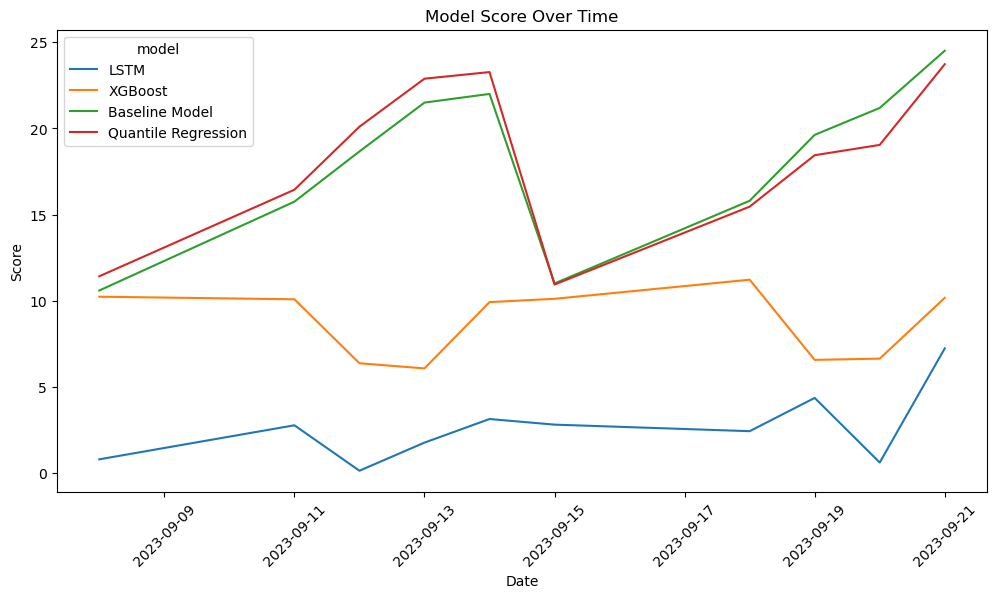

                                  mean     median       std
model               horizon                                
Baseline Model      1 day    10.805594  10.805594  0.289778
                    2 day    15.779572  15.779572  0.036368
                    3 day    19.149333  19.149333  0.679551
                    4 day    21.346807  21.346807  0.220182
                    5 day    23.258720  23.258720  1.772233
LSTM                1 day     1.812203   1.812203  1.423335
                    2 day     2.609191   2.609191  0.241902
                    3 day     2.256763   2.256763  2.987497
                    4 day     1.197823   1.197823  0.816877
                    5 day     5.192697   5.192697  2.898004
Quantile Regression 1 day    11.186851  11.186851  0.338036
                    2 day    15.955840  15.955840  0.694304
                    3 day    19.276756  19.276756  1.169906
                    4 day    20.968938  20.968938  2.716180
                    5 day    23.500610  

In [9]:
evaluations_3,grouped_scores_3=evaluate_per_year(last_year=3)

Last Timestamp 2023-09-07 00:00:00+02:00


2024-03-27 10:27:03.003885: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:03.005856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:03.006778: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-27 10:27:03.341921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:03.343151: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:03.344564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

13/13 - 2s - loss: 1.0012 - 2s/epoch - 138ms/step
Epoch 2/10
13/13 - 0s - loss: 0.9987 - 39ms/epoch - 3ms/step
Epoch 3/10
13/13 - 0s - loss: 0.9979 - 40ms/epoch - 3ms/step
Epoch 4/10
13/13 - 0s - loss: 0.9974 - 42ms/epoch - 3ms/step
Epoch 5/10
13/13 - 0s - loss: 0.9971 - 43ms/epoch - 3ms/step
Epoch 6/10
13/13 - 0s - loss: 0.9969 - 38ms/epoch - 3ms/step
Epoch 7/10
13/13 - 0s - loss: 0.9968 - 45ms/epoch - 3ms/step
Epoch 8/10
13/13 - 0s - loss: 0.9966 - 46ms/epoch - 4ms/step
Epoch 9/10
13/13 - 0s - loss: 0.9965 - 41ms/epoch - 3ms/step
Epoch 10/10
13/13 - 0s - loss: 0.9965 - 45ms/epoch - 3ms/step


2024-03-27 10:27:06.057434: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:06.058389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:06.059007: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 362ms/step
Last Timestamp 2023-09-14 00:00:00+02:00
Epoch 1/10


2024-03-27 10:27:06.445078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:06.446163: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:06.446819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

14/14 - 2s - loss: 1.0016 - 2s/epoch - 117ms/step
Epoch 2/10
14/14 - 0s - loss: 0.9991 - 43ms/epoch - 3ms/step
Epoch 3/10
14/14 - 0s - loss: 0.9984 - 46ms/epoch - 3ms/step
Epoch 4/10
14/14 - 0s - loss: 0.9978 - 45ms/epoch - 3ms/step
Epoch 5/10
14/14 - 0s - loss: 0.9974 - 71ms/epoch - 5ms/step
Epoch 6/10
14/14 - 0s - loss: 0.9971 - 74ms/epoch - 5ms/step
Epoch 7/10
14/14 - 0s - loss: 0.9968 - 48ms/epoch - 3ms/step
Epoch 8/10
14/14 - 0s - loss: 0.9967 - 51ms/epoch - 4ms/step
Epoch 9/10
14/14 - 0s - loss: 0.9965 - 49ms/epoch - 4ms/step
Epoch 10/10
14/14 - 0s - loss: 0.9965 - 47ms/epoch - 3ms/step


2024-03-27 10:27:08.852796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:08.853816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:08.854421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 407ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i - 1, j] = res.predict(hist.iloc[-1:])[0]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i - 1, j] = res.predict(hist.iloc[-1:])[0]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as pos

Most recent date: 2023-09-07 00:00:00+02:00


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_XGBoost.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_XGBoost.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{feature}_lag{lag}'] = df[feature].shift(lag)
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_XGBoost.py:66: SettingWithC

Most recent date: 2023-09-14 00:00:00+02:00


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

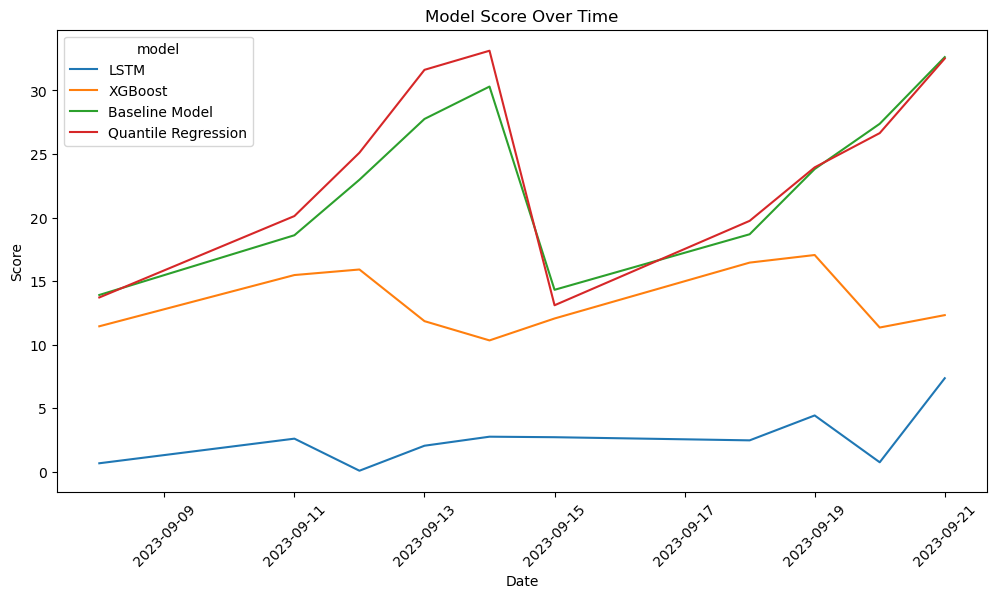

                                  mean     median       std
model               horizon                                
Baseline Model      1 day    14.118796  14.118796  0.287506
                    2 day    18.651469  18.651469  0.054764
                    3 day    23.398554  23.398554  0.595047
                    4 day    27.566410  27.566410  0.269009
                    5 day    31.461641  31.461641  1.637720
LSTM                1 day     1.707104   1.707104  1.448882
                    2 day     2.551158   2.551158  0.094623
                    3 day     2.269486   2.269486  3.073223
                    4 day     1.411199   1.411199  0.920345
                    5 day     5.071266   5.071266  3.251266
Quantile Regression 1 day    13.413648  13.413648  0.432932
                    2 day    19.933067  19.933067  0.267051
                    3 day    24.527087  24.527087  0.816737
                    4 day    29.131629  29.131629  3.517950
                    5 day    32.814798  

In [10]:
evaluations_4,grouped_scores_4=evaluate_per_year(last_year=4)

Last Timestamp 2023-09-07 00:00:00+02:00
Epoch 1/10


2024-03-27 10:27:17.098945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:17.100043: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:17.100684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 - 2s - loss: 1.0015 - 2s/epoch - 98ms/step
Epoch 2/10
17/17 - 0s - loss: 0.9993 - 55ms/epoch - 3ms/step
Epoch 3/10
17/17 - 0s - loss: 0.9989 - 51ms/epoch - 3ms/step
Epoch 4/10
17/17 - 0s - loss: 0.9987 - 49ms/epoch - 3ms/step
Epoch 5/10
17/17 - 0s - loss: 0.9987 - 52ms/epoch - 3ms/step
Epoch 6/10
17/17 - 0s - loss: 0.9986 - 52ms/epoch - 3ms/step
Epoch 7/10
17/17 - 0s - loss: 0.9986 - 54ms/epoch - 3ms/step
Epoch 8/10
17/17 - 0s - loss: 0.9985 - 55ms/epoch - 3ms/step
Epoch 9/10
17/17 - 0s - loss: 0.9985 - 54ms/epoch - 3ms/step
Epoch 10/10
17/17 - 0s - loss: 0.9985 - 58ms/epoch - 3ms/step


2024-03-27 10:27:19.549727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:19.550660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:19.551305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 376ms/step
Last Timestamp 2023-09-14 00:00:00+02:00


2024-03-27 10:27:19.941215: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:19.942183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:19.942792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2024-03-27 10:27:20.555812: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:20.556859: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:20.557553: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

17/17 - 2s - loss: 1.0008 - 2s/epoch - 97ms/step
Epoch 2/10
17/17 - 0s - loss: 0.9992 - 63ms/epoch - 4ms/step
Epoch 3/10
17/17 - 0s - loss: 0.9989 - 59ms/epoch - 3ms/step
Epoch 4/10
17/17 - 0s - loss: 0.9988 - 58ms/epoch - 3ms/step
Epoch 5/10
17/17 - 0s - loss: 0.9987 - 63ms/epoch - 4ms/step
Epoch 6/10
17/17 - 0s - loss: 0.9986 - 58ms/epoch - 3ms/step
Epoch 7/10
17/17 - 0s - loss: 0.9986 - 62ms/epoch - 4ms/step
Epoch 8/10
17/17 - 0s - loss: 0.9985 - 60ms/epoch - 4ms/step
Epoch 9/10
17/17 - 0s - loss: 0.9985 - 63ms/epoch - 4ms/step
Epoch 10/10
17/17 - 0s - loss: 0.9985 - 61ms/epoch - 4ms/step


2024-03-27 10:27:22.778965: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-03-27 10:27:22.779866: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-03-27 10:27:22.780488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 0s 379ms/step


/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i - 1, j] = res.predict(hist.iloc[-1:])[0]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred_quantile_regression[i - 1, j] = res.predict(hist.iloc[-1:])[0]
/Users/stephantimpe/PycharmProjects/probabilistic-forecasting-challenge/models/DAX/DAX_quantile_regression.py:26: FutureWarning: Series.__getitem__ treating keys as pos

Most recent date: 2023-09-07 00:00:00+02:00


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is depre

Most recent date: 2023-09-14 00:00:00+02:00


/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/stephantimpe/anaconda3/envs/Forecasting_Challenge_2/lib/python3.9/site-packages/seaborn/_oldc

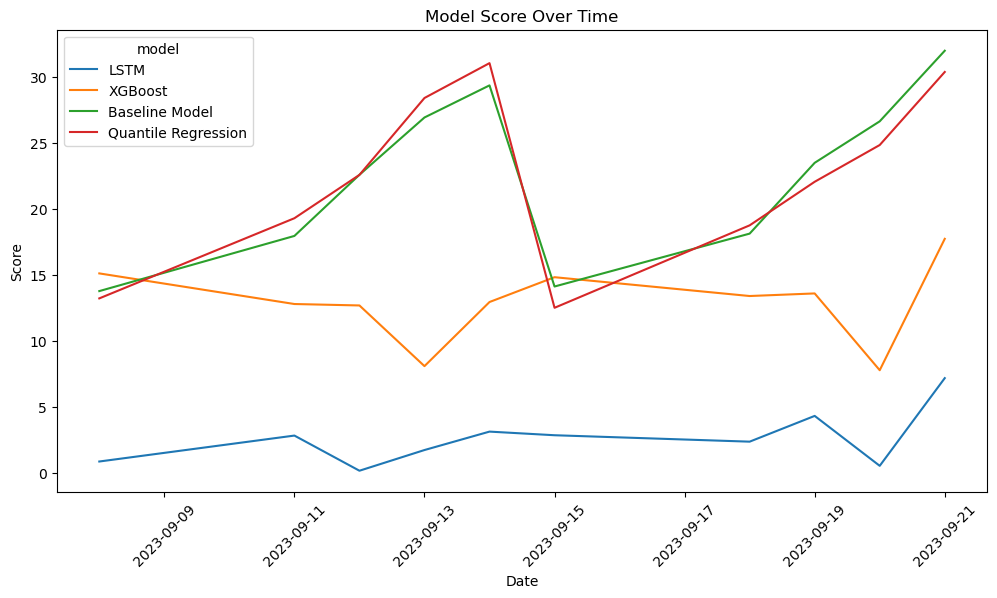

                                  mean     median       std
model               horizon                                
Baseline Model      1 day    13.950549  13.950549  0.245679
                    2 day    18.042364  18.042364  0.124099
                    3 day    23.039406  23.039406  0.640147
                    4 day    26.780238  26.780238  0.205863
                    5 day    30.669784  30.669784  1.855879
LSTM                1 day     1.864462   1.864462  1.407013
                    2 day     2.603652   2.603652  0.326029
                    3 day     2.247857   2.247857  2.936088
                    4 day     1.140728   1.140728  0.845809
                    5 day     5.159534   5.159534  2.864324
Quantile Regression 1 day    12.868420  12.868420  0.503298
                    2 day    19.025914  19.025914  0.381590
                    3 day    22.317376  22.317376  0.368817
                    4 day    26.621110  26.621110  2.518800
                    5 day    30.707622  

In [11]:
evaluations_5,grouped_scores_5=evaluate_per_year(last_year=5)

### Group scores per mean for each year period

In [1]:
# looking at 3 years
grouped_scores_3.groupby('model').mean()

NameError: name 'grouped_scores_3' is not defined

In [13]:
# looking at 4 years
grouped_scores_4.groupby('model').mean()

,mean,median,std
model,,,
Baseline Model,23.039374,23.039374,0.568809
LSTM,2.602042,2.602042,1.757668
Quantile Regression,23.964046,23.964046,1.093730
XGBoost,13.433015,13.433015,0.738184


In [14]:
# looking at 5 years
grouped_scores_5.groupby('model').mean()

,mean,median,std
model,,,
Baseline Model,22.496468,22.496468,0.614333
LSTM,2.603247,2.603247,1.675853
Quantile Regression,22.308088,22.308088,0.849240
XGBoost,12.899746,12.899746,0.975741


In [20]:
# pull the score from 3 years evaluation
evaluations_3[0]

,forecast_date,target,horizon,q0.025,q0.25,q0.5,q0.75,q0.975,actual_forecast_date,Open,...,future_ret3,future_ret4,future_ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,score,model
0,2023-09-07,DAX,1 day,0.016714,0.018875,0.021558,0.022259,0.027008,2023-09-08 00:00:00+02:00,15777.559570,...,0.549588,-0.412041,-0.968784,0.137574,-0.006800,-0.199354,-0.535717,-0.633555,0.805753,LSTM
1,2023-09-07,DAX,2 day,0.025015,0.030360,0.031180,0.034774,0.035098,2023-09-11 00:00:00+02:00,15799.419922,...,-0.027209,-0.583951,0.468599,0.384832,0.522406,0.378033,0.185478,-0.150885,2.780242,LSTM
2,2023-09-07,DAX,3 day,0.042646,0.046036,0.046408,0.046555,0.052545,2023-09-12 00:00:00+02:00,15804.080078,...,-1.126271,-0.073721,0.325365,-0.542320,-0.157488,-0.019914,-0.164287,-0.356841,0.144284,LSTM
3,2023-09-07,DAX,4 day,0.054815,0.057049,0.058398,0.061182,0.063551,2023-09-13 00:00:00+02:00,15648.919922,...,-0.465821,-0.066735,-0.811565,-0.392100,-0.934420,-0.549588,-0.412014,-0.556388,1.775443,LSTM
4,2023-09-07,DAX,5 day,0.071035,0.076627,0.077576,0.078061,0.081484,2023-09-14 00:00:00+02:00,15652.410156,...,0.894894,0.150064,1.487923,0.961629,0.569528,0.027209,0.412041,0.549615,3.143498,LSTM
0,2023-09-14,DAX,1 day,0.000392,0.000739,0.001757,0.006646,0.011704,2023-09-15 00:00:00+02:00,15940.389648,...,0.706806,2.044666,2.138278,0.556743,1.518372,1.126271,0.583951,0.968784,2.818653,LSTM
1,2023-09-14,DAX,2 day,0.007114,0.008080,0.008785,0.011065,0.011793,2023-09-18 00:00:00+02:00,15858.809570,...,0.992116,1.085728,2.066266,-1.052551,-0.495808,0.465821,0.073721,-0.468599,2.438140,LSTM
2,2023-09-14,DAX,3 day,0.019635,0.020653,0.022990,0.023521,0.024131,2023-09-19 00:00:00+02:00,15688.070312,...,0.686642,1.667180,2.643140,-0.399086,-1.451637,-0.894894,0.066735,-0.325365,4.369243,LSTM
3,2023-09-14,DAX,4 day,0.023698,0.024396,0.029679,0.032046,0.032149,2023-09-20 00:00:00+02:00,15703.089844,...,2.412011,3.387971,3.640125,0.744830,0.345744,-0.706806,-0.150064,0.811565,0.620204,LSTM
4,2023-09-14,DAX,5 day,0.037120,0.039569,0.042182,0.043074,0.045307,2023-09-21 00:00:00+02:00,15650.980469,...,2.050111,2.302265,1.607786,-1.337860,-0.593030,-0.992116,-2.044666,-1.487923,7.241895,LSTM


In [35]:
import numpy as np
from functions import evaluation, naive_ensemble

weight_i = np.arange(0, 1.1, 0.01)
weight_store = dict()
for i in weight_i:
    df_models = [evaluations_3[0], evaluations_3[3]]  # Your DataFrames containing the forecasts
    weights = [i, 1 - i]  # Weights for each model's forecast
    ensemble_df = naive_ensemble.ensemble(df_models, weights)
    ensemble_df = ensemble_df.reset_index(drop=True)
    for index, row in ensemble_df.iterrows():
        horizon_days = int(row['horizon'].split()[0])
        ret_str = f'lag_ret{horizon_days}'
        observation = row[ret_str]
        quantile_preds = row[['q0.025', 'q0.25', 'q0.5', 'q0.75', 'q0.975']]
        score = evaluate_horizon(quantile_preds.values, observation)
        ensemble_df.at[index, 'score'] = score
    print(i, ensemble_df['score'].mean())
    # store the score
    weight_store[i, 1 - i] = ensemble_df['score'].mean()

0.0 2.4007475996523393
0.01 2.389347197315027
0.02 2.37794678670757
0.03 2.3665463983028427
0.04 2.3551459398626577
0.05 2.3456300600391664
0.06 2.337592163975132
0.07 2.3304182425837636
0.08 2.3232443010758277
0.09 2.3160703696634295
0.1 2.3089828500078537
0.11 2.302929289743445
0.12 2.2968757043333268
0.13 2.2909911394263625
0.14 2.286020757011604
0.15 2.281050408496988
0.16 2.2760799928153874
0.17 2.2711096001560804
0.18 2.266139241843951
0.19 2.2611688754851937
0.2 2.25619849467231
0.21 2.2512281274567365
0.22 2.2462577187414285
0.23 2.24128735711379
0.24 2.236316946349573
0.25 2.2313465799908156
0.26 2.2263761937390085
0.27 2.2224655318249478
0.28 2.218772566168429
0.29 2.2150795900065914
0.3 2.211386623605015
0.31 2.2076936384279744
0.32 2.2040006716538683
0.33 2.200307721233787
0.34 2.1966147347528953
0.35000000000000003 2.1929217566166535
0.36 2.189228795542242
0.37 2.1855358243722933
0.38 2.1818428548600988
0.39 2.178149894269975
0.4 2.1744569384482224
0.41000000000000003 2.17

In [36]:
best_weight = min(weight_store, key=weight_store.get)
best_weight

(0.56, 0.43999999999999995)

In [37]:
weight_store[best_weight]

2.13056949004359

In [24]:
daxdata

,Open,High,Low,Close,Volume,Dividends,Stock Splits,future_ret1,future_ret2,future_ret3,future_ret4,future_ret5,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5
Date,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00+01:00,10477.769531,10612.719727,10386.969727,10580.190430,79626700,0.0,0.0,1.557696,-1.756660,-1.571855,-2.093120,-2.916636,0.200864,1.895711,-0.505609,-0.291716,-1.742910
2019-01-03 00:00:00+01:00,10467.110352,10538.660156,10400.110352,10416.660156,84733800,0.0,0.0,-3.314356,-3.129551,-3.650817,-4.474332,-4.733509,-1.557696,-1.356832,0.338015,-2.063305,-1.849412
2019-01-04 00:00:00+01:00,10533.940430,10786.339844,10483.900391,10767.690430,95339500,0.0,0.0,0.184805,-0.336460,-1.159976,-1.419153,-1.106164,3.314356,1.756660,1.957524,3.652371,1.251051
2019-01-07 00:00:00+01:00,10814.389648,10814.469727,10681.269531,10747.809570,71151400,0.0,0.0,-0.521266,-1.344781,-1.603958,-1.290969,-1.000767,-0.184805,3.129551,1.571855,1.772719,3.467566
2019-01-08 00:00:00+01:00,10750.190430,10910.709961,10745.030273,10803.980469,93672200,0.0,0.0,-0.823516,-1.082692,-0.769704,-0.479502,-0.809467,0.521266,0.336460,3.650817,2.093120,2.293984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21 00:00:00+01:00,18019.859375,18179.810547,18019.859375,18179.250000,79118500,0.0,0.0,-0.146705,-0.450381,-1.121890,-1.309162,NaN,0.906883,1.060430,1.365610,1.343471,1.313432
2024-03-22 00:00:00+01:00,18175.080078,18225.970703,18140.990234,18205.939453,68616300,0.0,0.0,-0.303676,-0.975185,-1.162457,NaN,NaN,0.146705,1.053588,1.207136,1.512316,1.490176
2024-03-25 00:00:00+01:00,18206.359375,18285.580078,18176.849609,18261.310547,53804600,0.0,0.0,-0.671509,-0.858781,NaN,NaN,NaN,0.303676,0.450381,1.357264,1.510811,1.815991
